In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from numpy import asarray

In [ ]:
images = []
label = []

folder = "cell_images"
folder_dir= os.listdir(folder)

directories = [d for d in folder_dir if os.path.isdir(os.path.join("cell_images", d))]
#loading all the image data
category = 0
for d in directories:
    label_dir = os.path.join("cell_images",d)
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".png")]
    
    for each in file_names:
        img = cv2.imread(each)
        res = cv2.resize(img,(200,150))
        images.append(res)
        label.append(category)
    category += 1
        

In [4]:
Data=np.asarray(images)
Data.shape

(27558, 150, 200, 3)

In [5]:
Label=np.array(label)
Label.shape

(27558,)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Data, Label, test_size = 0.2, stratify=Label, random_state = 1256)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(22046, 150, 200, 3)
(22046,)
(5512, 150, 200, 3)
(5512,)


In [7]:
#normalizing data

x_train = x_train[:20000].astype('float32')
x_test = x_test.astype('float32')

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = np.array(y_train[:20000])
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_train.shape[1]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten, BatchNormalization

#creating model
model = Sequential()

#1 convolutionlayer

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (150,200,3) ,activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Dropout(0.2))

#2 convolutionlayer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(BatchNormalization())

#3 convolutionlayer
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(BatchNormalization())

#4 convolutionlayer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())

#Fully connected Layer
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))

#output
model.add(Dense(units = num_classes, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 48, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 36, 48, 64)       2

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

ES = EarlyStopping(monitor='loss', patience=3)

seed = 1805
np.random.seed(seed)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10, callbacks=[ES])

Epoch 1/10
313/313 [==============================] - 2234s 7s/step - loss: 0.6301 - accuracy: 0.8189 - val_loss: 0.4588 - val_accuracy: 0.6584
Epoch 2/10
313/313 [==============================] - 2057s 7s/step - loss: 0.2167 - accuracy: 0.9308 - val_loss: 0.1633 - val_accuracy: 0.9517
Epoch 3/10
313/313 [==============================] - 2024s 6s/step - loss: 0.1844 - accuracy: 0.9424 - val_loss: 0.1691 - val_accuracy: 0.9445
Epoch 4/10
313/313 [==============================] - 2130s 7s/step - loss: 0.1627 - accuracy: 0.9485 - val_loss: 0.1282 - val_accuracy: 0.9594
Epoch 5/10
313/313 [==============================] - 1986s 6s/step - loss: 0.1491 - accuracy: 0.9528 - val_loss: 0.1261 - val_accuracy: 0.9626
Epoch 6/10
313/313 [==============================] - 2182s 7s/step - loss: 0.1398 - accuracy: 0.9549 - val_loss: 0.1269 - val_accuracy: 0.9592
Epoch 7/10
313/313 [==============================] - 1831s 6s/step - loss: 0.1298 - accuracy: 0.9585 - val_loss: 0.1271 - val_accuracy:

In [11]:
print(len(history.history['loss']))

10


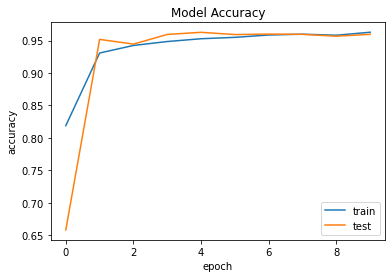

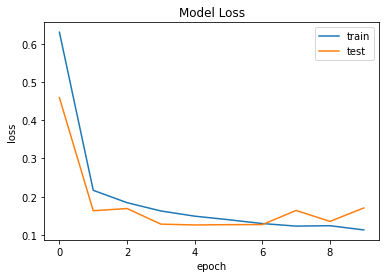

In [14]:
import matplotlib.pyplot as plt

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [17]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
print(pred.shape) #the predictions return in one-hot encoding format
pred = np.argmax(pred, axis=1)
print(pred.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, pred, target_names=directories))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

 Parasitized       0.96      0.96      0.96      2756
  Uninfected       0.96      0.96      0.96      2756

    accuracy                           0.96      5512
   macro avg       0.96      0.96      0.96      5512
weighted avg       0.96      0.96      0.96      5512



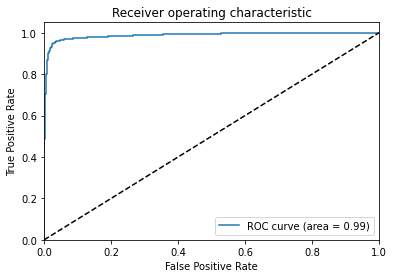

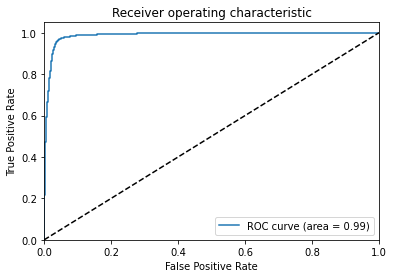

In [19]:
from sklearn.metrics import roc_curve, auc

y_predict = model.predict(x_test) # get the prediction probabilities

false_positive_rate = dict()
true_positive_rate = dict()
roc_auccuracy = dict()
for i in range(num_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test[:, i], y_predict[:, i])
    roc_auccuracy[i] = auc(false_positive_rate[i], true_positive_rate[i])
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(false_positive_rate[i], true_positive_rate[i], label='ROC curve (area = %0.2f)' % roc_auccuracy[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(y_predict, axis=1)
y_te = np.argmax(y_test, axis=1)
#Generate confusion matrix
cf_matrix = confusion_matrix(y_te, y_pred)

print(cf_matrix)

[[2651  105]
 [ 118 2638]]


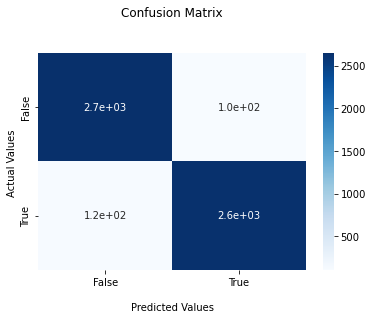

In [23]:
import seaborn as sb

plot = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

plot.set_title('Confusion Matrix\n\n');
plot.set_xlabel('\nPredicted Values')
plot.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
plot.xaxis.set_ticklabels(['False','True'])
plot.yaxis.set_ticklabels(['False','True'])

## Display Confusion Matrix.
plt.show()